<a href="https://colab.research.google.com/github/Sneha1928/Hyperparameter-Tuning/blob/main/GridSearchCV_Select_the_best_hyperparameter_for_any_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the dataset
dataset = pd.read_csv("/content/drive/MyDrive/MY ML PROJECTS/Advertising_data.csv")


[Dataset](https://drive.google.com/file/d/1hGmfZU7gYNx89IZNA2pp_obPC_9wDtV5/view?usp=sharing)

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

Here, I am taking only the numerical values because our aim is to learn and understand the gridserachcv.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


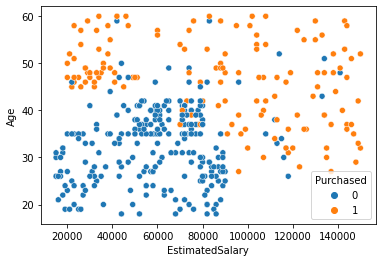

In [ ]:
import seaborn as sns
sns.scatterplot(dataset["EstimatedSalary"], dataset["Age"],hue = dataset["Purchased"],cmap = 'seismic')

By the scatterplot we can see that we can build svm model, but whether or not to take linear or non-linear we will have to figure out. For instance, let's take linear kernel.

In [ ]:
# Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# fitting kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state = 0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Model has taken the default parameter, we need to check if its the right one.

In [ ]:
# Predicting
Pred = classifier.predict(X_test)

In [ ]:
# Making Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Pred)

0.88

But how do we understand if this is the best of all the models or how do we understand that the kernel should be linear or not. So for that GridSearchCV is applied so that we can check all the selected parameters in the grid and choose the one which is giving the best accuracy. 

In [ ]:
# Appling GridSearchCV to find the best model and the best parameters.

from sklearn.model_selection import GridSearchCV

parameters = [{'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'kernel':['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search  = grid_search.fit(X_train,y_train)

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example.

In [ ]:
grid_search.best_score_

0.9066666666666666

In [ ]:
grid_search.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
grid_search.best_params_

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}

GridSearchCV is saying that kernel should be 'rbf'.

Using the best parameters to build the model.

In [ ]:
classifier = SVC(C = 1, gamma = 0.7, kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting
Pred = classifier.predict(X_test)

In [ ]:
# Making Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Pred)

0.93

Hence, using gridsearchcv we got the best model. 